In [1]:
cd E:\karthi_m\wind

E:\karthi_m\wind


In [2]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
da=pd.read_csv('data1.csv')

In [4]:
da.head()

,windspeed,airdensity,amb_temp,nac_direction,blds_pitchangle,rtr_rpm,gen_rpm,wtg_state
0,9.1,1.162127,27,61.8,"(-2,-4)",14.1,1305.0,ok
1,9.6,1.162127,27,61.8,"(-2,-4)",14.4,1336.0,ok
2,9.6,1.162127,27,61.8,"(-2,-4)",14.4,1330.0,ok
3,11.2,1.162127,27,65.2,"(-0.1,-1.9)",14.5,1345.0,ok
4,11.4,1.162127,27,66.6,"(-0.1,-1.9)",14.5,1344.0,ok


In [5]:
da['wtg_state'].value_counts()

ok                   44020
wind low              8658
curtailed             4186
Gen not conn          3896
high wind cut-out       29
Name: wtg_state, dtype: int64

In [9]:
x= da.drop(['wtg_state'],axis=1)
y= da['wtg_state']

In [10]:
x2=pd.get_dummies(x['blds_pitchangle'],drop_first=True)
x1=x.drop(['blds_pitchangle'],axis=1)
x= pd.concat([x1, x2], axis=1)

In [59]:
#Feature importance

In [11]:
from sklearn.ensemble import RandomForestClassifier
rcf = RandomForestClassifier()      
rcf = rcf.fit(x,y)
importances = rcf.feature_importances_

In [12]:
std = np.std([tree.feature_importances_ for tree in rcf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 0 (0.339532)
2. feature 5 (0.216673)
3. feature 3 (0.146110)
4. feature 4 (0.115976)
5. feature 6 (0.075878)
6. feature 7 (0.061420)
7. feature 1 (0.017604)
8. feature 2 (0.016657)
9. feature 9 (0.009276)
10. feature 8 (0.000875)


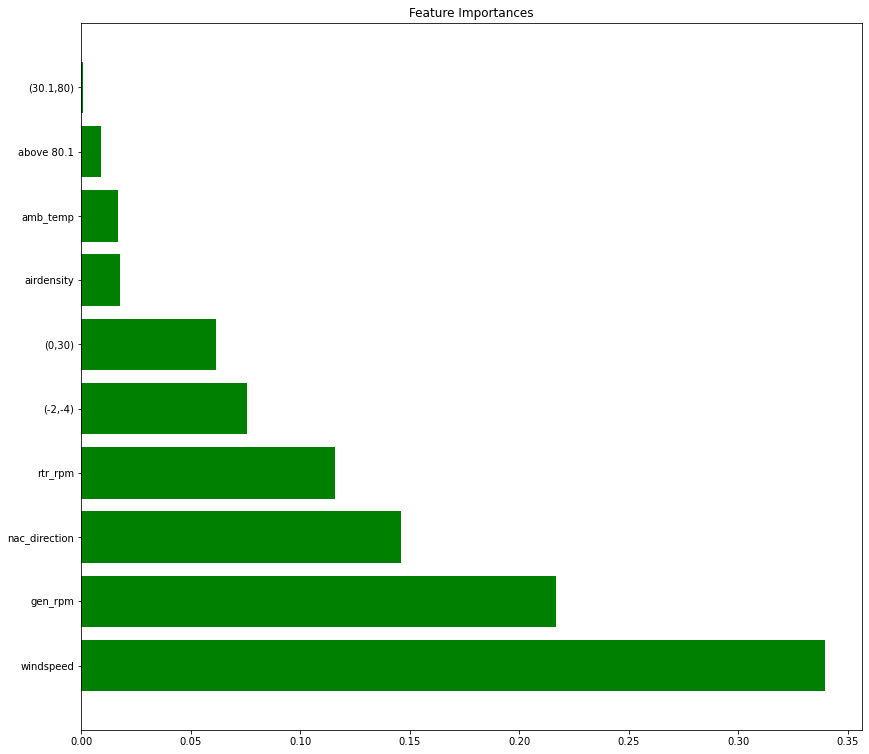

In [25]:
plt.figure(1, figsize=(14, 13))
plt.title("Feature Importances")
plt.barh(range(x.shape[1]), importances[indices], color="g",  align="center")
plt.yticks(range(x.shape[1]), x.columns[indices], rotation=360)
plt.ylim([-1, x.shape[1]])
plt.show()